In [1]:
import os
import sys
import yaml
import tools.objects as objs

with open("/home/jovyan/work/input_data/config/project_config.yml", 'r') as file:
    config = yaml.safe_load(file)

In [2]:
# Initialize project
project = objs.Project(config)

INFO – === Initializing Project ===
INFO – Project directory: /home/jovyan/work/output_data/Cvetkovska_508469_Chlamydomonas


In [3]:
# Create dataset objects (which hold raw data and metadata)
tx_dataset = objs.TX(project, overwrite=True)
mx_dataset = objs.MX(project, overwrite=True)

INFO – === Initializing Datasets ===
INFO – Overwriting existing dataset processing directory for tx at /home/jovyan/work/output_data/Cvetkovska_508469_Chlamydomonas/Dataset_Processing--5/transcriptomics.
INFO – === Initializing Datasets ===
INFO – Overwriting existing dataset processing directory for mx at /home/jovyan/work/output_data/Cvetkovska_508469_Chlamydomonas/Dataset_Processing--5/metabolomics.


In [4]:
# Create analysis object (collection of datasets and methods for performing integration)
analysis = objs.Analysis(project, datasets=[tx_dataset, mx_dataset], overwrite=True)

INFO – === Initializing Analysis ===
INFO – Overwriting existing analysis directory /home/jovyan/work/output_data/Cvetkovska_508469_Chlamydomonas/Dataset_Processing--5/Analysis--0.
INFO – Created analysis with 2 datasets.
INFO – 	- tx with output directory: /home/jovyan/work/output_data/Cvetkovska_508469_Chlamydomonas/Dataset_Processing--5/transcriptomics
INFO – 	- mx with output directory: /home/jovyan/work/output_data/Cvetkovska_508469_Chlamydomonas/Dataset_Processing--5/metabolomics


In [5]:
# Get metadata and data from disk, cache, or generate from source
tx_dataset.get_raw_metadata(overwrite=False)
tx_dataset.get_raw_data(overwrite=False)
mx_dataset.get_raw_metadata(overwrite=False)
mx_dataset.get_raw_data(overwrite=False)

INFO – === Getting Raw Metadata (TX) ===
INFO – raw_metadata file found on disk for tx. Loading from file.
INFO – 	tx metadata file with 48 samples and 20 metadata fields.
INFO – === Getting Raw Data (TX) ===
INFO – raw_data file found on disk for tx. Loading from file.
INFO – 	tx data file with 14754 samples and 49 features.
INFO – === Getting Raw Metadata (MX) ===
INFO – raw_metadata file found on disk for mx. Loading from file.
INFO – 	mx metadata file with 124 samples and 4 metadata fields.
INFO – === Getting Raw Data (MX) ===
INFO – raw_data file found on disk for mx. Loading from file.
INFO – 	mx data file with 15722 samples and 121 features.


In [6]:
# Link analysis datasets by finding corresponding samples and metadata
analysis.link_metadata(overwrite=False)
analysis.link_data(overwrite=False)

INFO – === Linking analysis datasets along shared metadata ===
INFO – linked_metadata file found on disk for tx. Loading from file.
INFO – linked_metadata file found on disk for mx. Loading from file.
INFO – === Linking analysis datasets along shared samples ===
INFO – linked_data file found on disk for tx. Loading from file.
INFO – linked_data file found on disk for mx. Loading from file.


In [7]:
# Filter out rare features from analysis datasets based on minimum observed value or proportion of missing values across samples
analysis.filter_all_datasets(overwrite=False)

INFO – === Filtering Data ===
INFO – Filtering tx dataset...
INFO – filtered_data file found on disk for tx. Loading from file.
INFO – Filtering mx dataset...
INFO – filtered_data file found on disk for mx. Loading from file.


In [8]:
# Filter out features from analysis datasets that were not impacted by experimentation based on low variance across samples
analysis.devariance_all_datasets(overwrite=False)

INFO – === Devariancing Data ===
INFO – Devariancing tx dataset...
INFO – devarianced_data file found on disk for tx. Loading from file.
INFO – Devariancing mx dataset...
INFO – devarianced_data file found on disk for mx. Loading from file.


In [9]:
# Scale features in all analysis datasets to a shared, normalized distribution
analysis.scale_all_datasets(overwrite=False)

INFO – === Scaling Data ===
INFO – Scaling tx dataset...
INFO – scaled_data file found on disk for tx. Loading from file.
INFO – Scaling mx dataset...
INFO – scaled_data file found on disk for mx. Loading from file.


In [10]:
# Filter out features from analysis datasets based on low within-replicate reproducibility
analysis.replicability_test_all_datasets(overwrite=False)

INFO – === Removing Unreplicable Features ===
INFO – Removing low replicable features from tx dataset...
INFO – normalized_data file found on disk for tx. Loading from file.
INFO – Removing low replicable features from mx dataset...
INFO – normalized_data file found on disk for mx. Loading from file.


INFO – === Plotting feature value distributions for all datasets ===
INFO – Saving plot to /home/jovyan/work/output_data/Cvetkovska_508469_Chlamydomonas/Dataset_Processing--5/Analysis--0/dataset_distributions/distribution_of_normalized_datasets.pdf...
INFO – 
Datasets should follow similar distributions, while quantitative values can be slightly shifted:


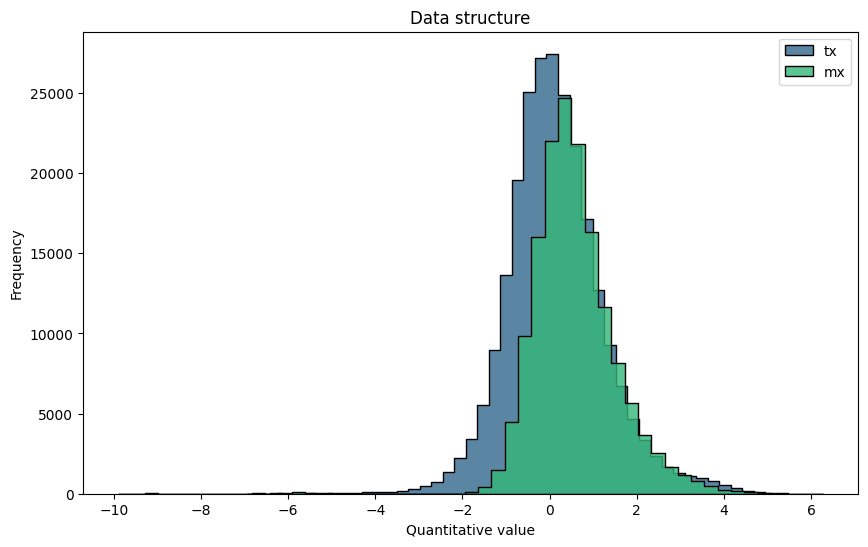

In [11]:
# Check data distributions after all normalization steps
analysis.plot_dataset_distributions(show_plot=True)

In [12]:
# Check dimension reduction plots after data normalization steps
analysis.plot_pca_all_datasets(overwrite=False)

INFO – === Plotting Individual PCAs and Grid ===
INFO – Plotting PCA for tx dataset...
INFO – === Plotting individual PCAs and grid ===
INFO – PCA grid plot already exists at /home/jovyan/work/output_data/Cvetkovska_508469_Chlamydomonas/Dataset_Processing--5/transcriptomics/plots. Skipping.
INFO – Plotting PCA for mx dataset...
INFO – === Plotting individual PCAs and grid ===
INFO – PCA grid plot already exists at /home/jovyan/work/output_data/Cvetkovska_508469_Chlamydomonas/Dataset_Processing--5/metabolomics/plots. Skipping.


In [13]:
# Perform dataset integration of linked metadata and data
analysis.integrate_metadata(overwrite=True)
analysis.integrate_data(overwrite=True)

INFO – === Integrating metadata across data types ===
INFO – integrated_metadata exists but overwrite=True. Regenerating...
INFO – Creating a single integrated (shared) metadata table across datasets...
INFO – Writing integrated metadata table...
INFO – 	Data saved to /home/jovyan/work/output_data/Cvetkovska_508469_Chlamydomonas/Dataset_Processing--5/Analysis--0/integrated_metadata.csv

INFO – Created a single integrated metadata table with 48 samples and 4 metadata fields.

INFO – === Integrating data matrices across data types ===
INFO – integrated_data exists but overwrite=True. Regenerating...
INFO – Creating a single integrated feature matrix across datasets...
INFO – 	Adding 6852 features from tx
INFO – 	Adding 4277 features from mx
INFO – 	Restricting to overlapping samples across all datasets...
INFO – 	tx: 36 overlapping samples
INFO – 	mx: 36 overlapping samples
INFO – Final integrated dataset: 11129 features x 36 samples
INFO – Writing integrated data table...
INFO – 	Data s

In [14]:
# Subset features using statistical tests
analysis.perform_feature_selection(overwrite=False)

INFO – === Subsetting Features before Network Analysis ===
INFO – integrated_data_selected file found on disk. Loading from file.
INFO – 	Feature selection data object 'integrated_data_selected' with 5000 features and 36 samples.


In [15]:
# Calculate correlations with custom parameters
analysis.calculate_correlated_features(overwrite=False)

INFO – === Calculating Correlated Features ===
INFO – feature_correlation_table file found on disk. Loading from file.
INFO – 	Feature correlation table object 'feature_correlation_table' with 42660 feature pairs.


In [16]:
# Plot correlation network
analysis.plot_correlation_network(overwrite=True)

INFO – === Plotting Correlation Network ===
INFO – feature_network_graph exists but overwrite=True. Regenerating...
INFO – feature_network_node_table exists but overwrite=True. Regenerating...
INFO – feature_network_edge_table exists but overwrite=True. Regenerating...
INFO – 	Graph built -  2,988 nodes, 42,660 edges
INFO – 	Removed 4 tiny components (<3 nodes).
INFO – 	Raw graph, node table and edge table written to disk.
INFO – Detecting submodules using 'louvain' …
INFO – 	Main graph updated with submodule annotations and written to disk.
INFO – Created correlation network graph and associated node/edge tables.



INFO – === Running MOFA2 Analysis ===
INFO – Converted omics data to mofa2 format:


        #########################################################
        ###           __  __  ____  ______                    ### 
        ###          |  \/  |/ __ \|  ____/\    _             ### 
        ###          | \  / | |  | | |__ /  \ _| |_           ### 
        ###          | |\/| | |  | |  __/ /\ \_   _|          ###
        ###          | |  | | |__| | | / ____ \|_|            ###
        ###          |_|  |_|\____/|_|/_/    \_\              ###
        ###                                                   ### 
        ######################################################### 
       
 
        


Loaded group='HighS_HighL_0h_Initial' view='mx' with N=3 samples and D=3682 features...
Loaded group='HighS_HighL_0h_Initial' view='tx' with N=3 samples and D=1318 features...
Loaded group='HighS_HighL_12h_HeatStr' view='mx' with N=3 samples and D=3682 features...
Loaded group='HighS_HighL_12h_

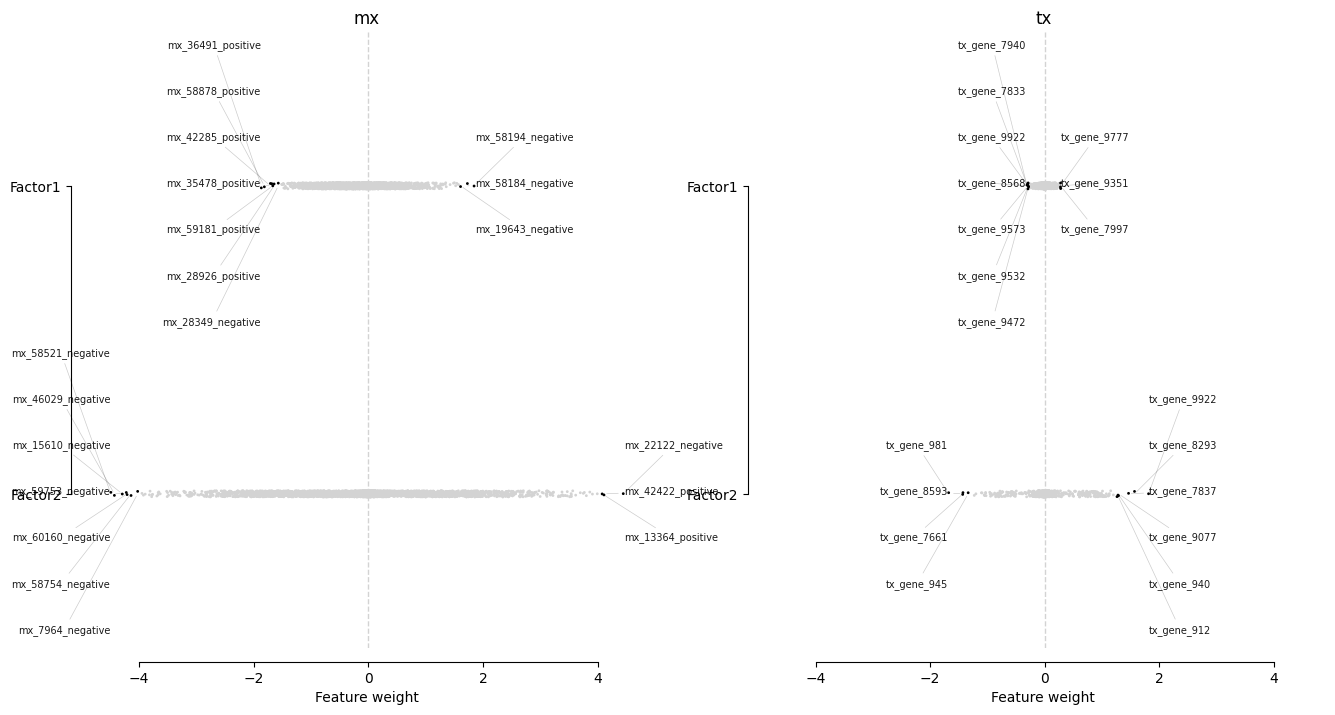

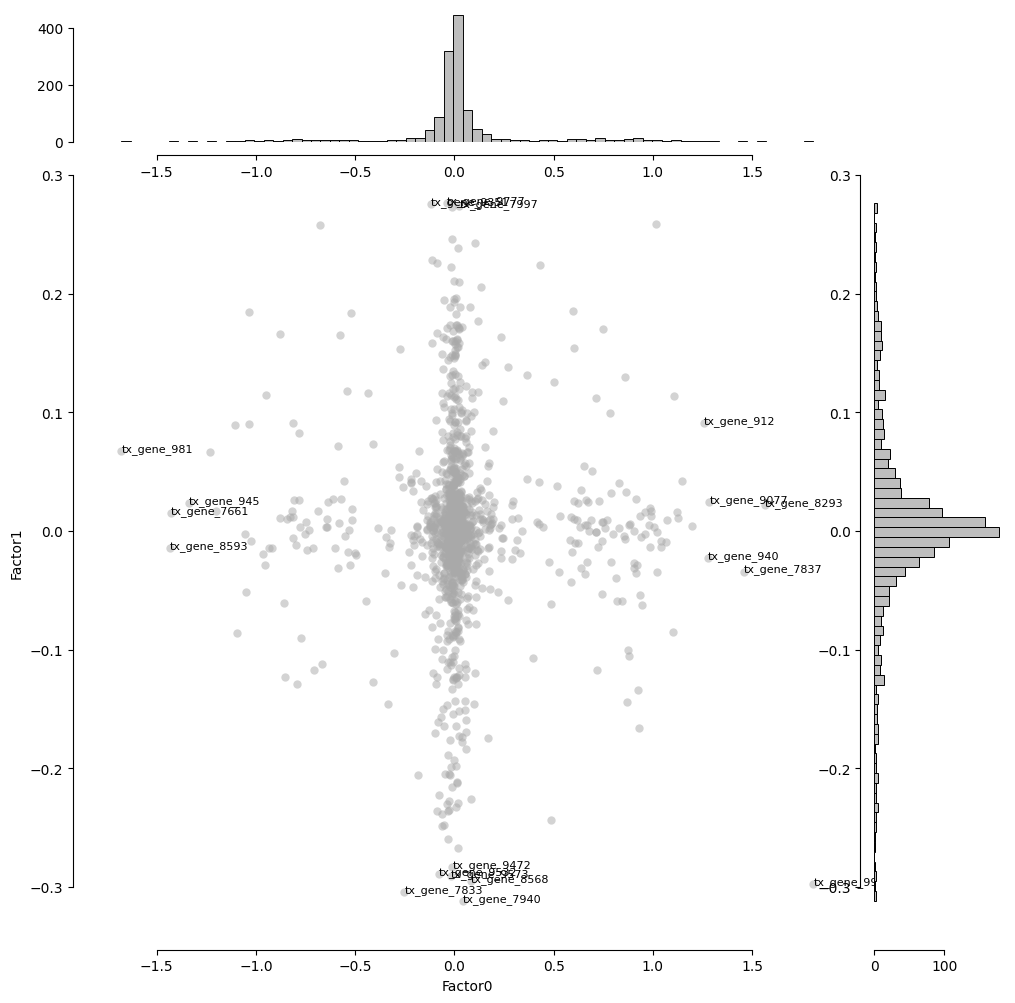

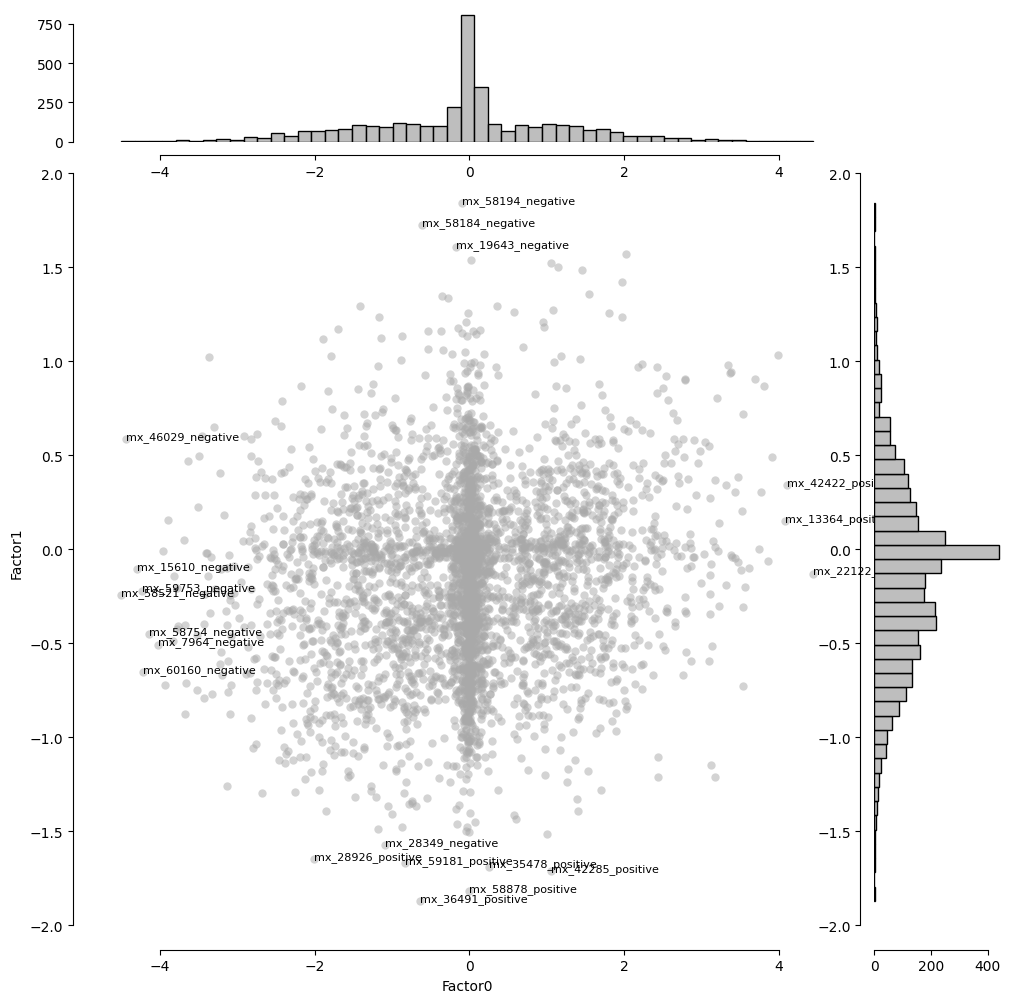

In [17]:
# Run multi-omics factor analysis
analysis.run_mofa2_analysis(overwrite=False)